In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

In [2]:
df = pd.read_csv('clean.csv')


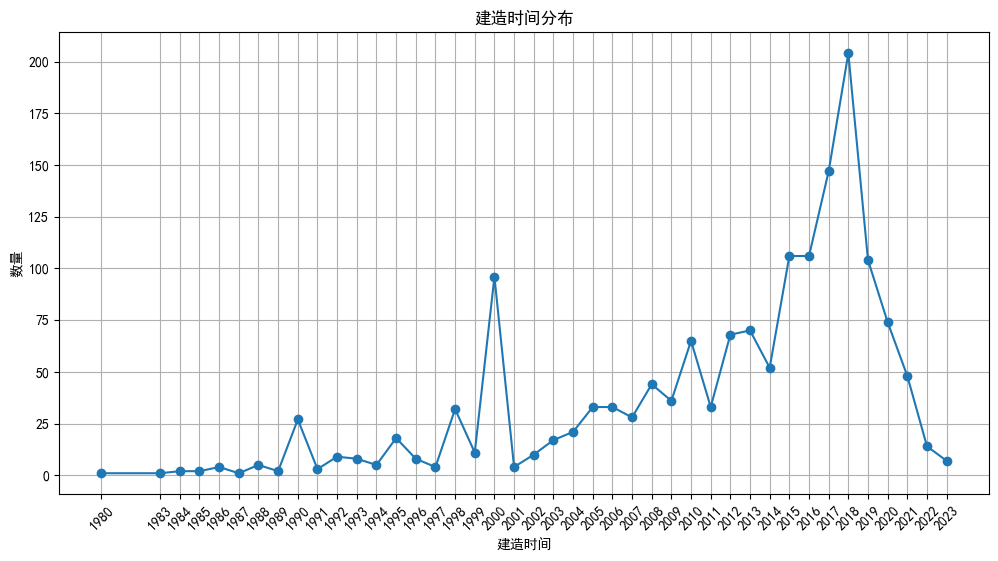

In [3]:
date = df['建造时间'].value_counts()
# 按照时间升序排序
date_sorted = date.sort_index()

# 将排序后的日期和数量分开存放
dates_sorted = date_sorted.index
counts_sorted = date_sorted.values

# 创建折线图
plt.figure(figsize=(12, 6))
plt.plot(dates_sorted, counts_sorted, marker='o', linestyle='-')
plt.title('建造时间分布')
plt.xlabel('建造时间')
plt.ylabel('数量')
plt.xticks(dates_sorted, rotation=45)
plt.grid(True)
plt.show()

In [4]:
df = pd.read_csv('clean.csv')
# 使用 groupby 聚合函数计算每个区域的房屋数量和平均价格
df_stats = df.groupby('区域').agg({'总价（万）': 'count', '单价': 'mean'})

 # 重置索引并更改列名
df_stats = df_stats.reset_index().rename(columns={'区域': '城市名', '总价（万）': '房屋数量', '单价': '平均价格'})

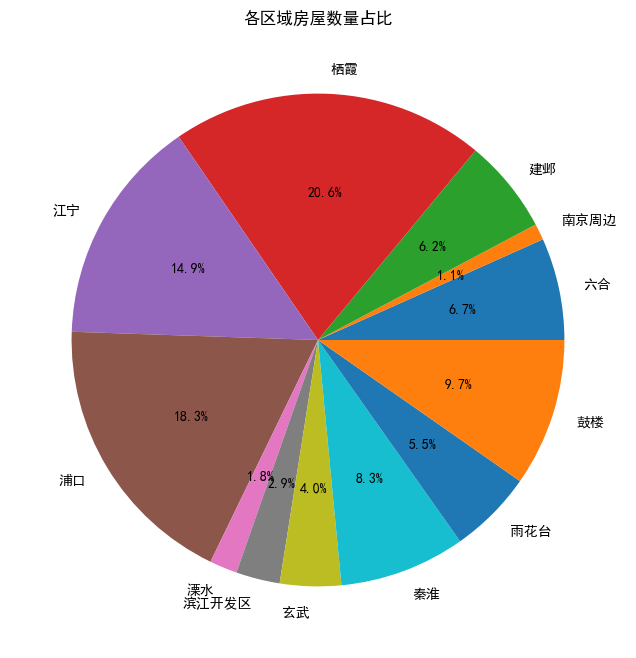

In [5]:
# 获取城市名和房屋数量
city_names = df_stats['城市名']
house_counts = df_stats['房屋数量']

# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie(house_counts, labels=city_names, autopct='%1.1f%%')
plt.title('各区域房屋数量占比')
plt.show()

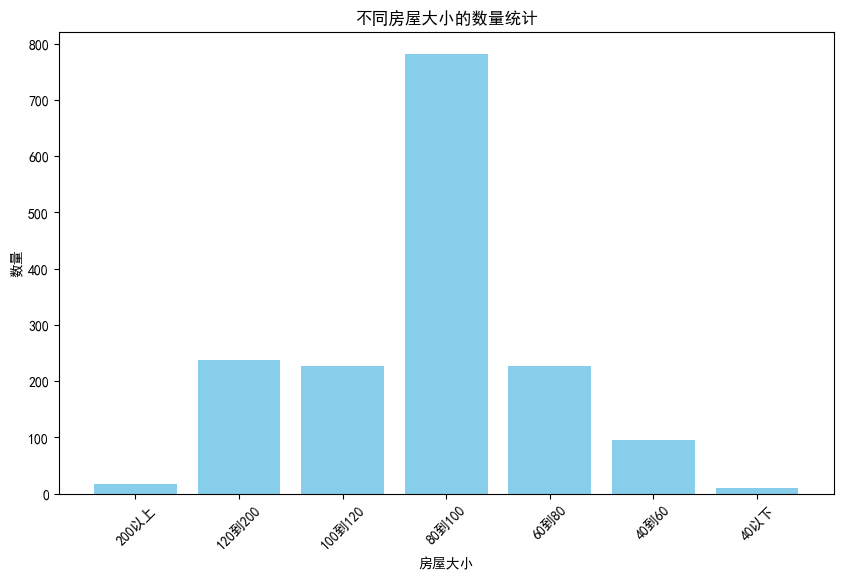

In [6]:
df = pd.read_csv('clean.csv')
df['大小'] = df['大小'].astype(int)

res_dict = {
    '200以上': 0,
    '120到200': 0,
    '100到120': 0,
    '80到100': 0,
    '60到80': 0,
    '40到60': 0,
    '40以下': 0
}

for item in list(df['大小']):
    if item > 200:
        res_dict['200以上'] += 1
    elif 200 > item >= 120:
        res_dict['120到200'] += 1
    elif 120 > item >= 100:
        res_dict['100到120'] += 1
    elif 100 > item >= 80:
        res_dict['80到100'] += 1
    elif 80 > item >= 60:
        res_dict['60到80'] += 1
    elif 60 > item >= 40:
        res_dict['40到60'] += 1
    elif item < 40:
        res_dict['40以下'] += 1

x_list = []
y_list = []

for k, v in res_dict.items():
    x_list.append(k)
    y_list.append(v)

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(x_list, y_list, color='skyblue')
plt.xlabel('房屋大小')
plt.ylabel('数量')
plt.title('不同房屋大小的数量统计')
plt.xticks(rotation=45)  # 使x轴标签倾斜，以防止重叠
plt.show()

In [7]:
df = pd.read_csv('clean.csv')
v_list = list(df['房间数'].value_counts().sort_values(ascending=False))[:30]
k_list = list(df['房间数'].value_counts().sort_values(ascending=False).index)[:30]
result = []
for item in range(len(v_list)):
    result.append((v_list[item], k_list[item]))

xiangxing = []
for n in k_list:
    xiangxing.append(list(df[df['房间数'] == n]['单价']))


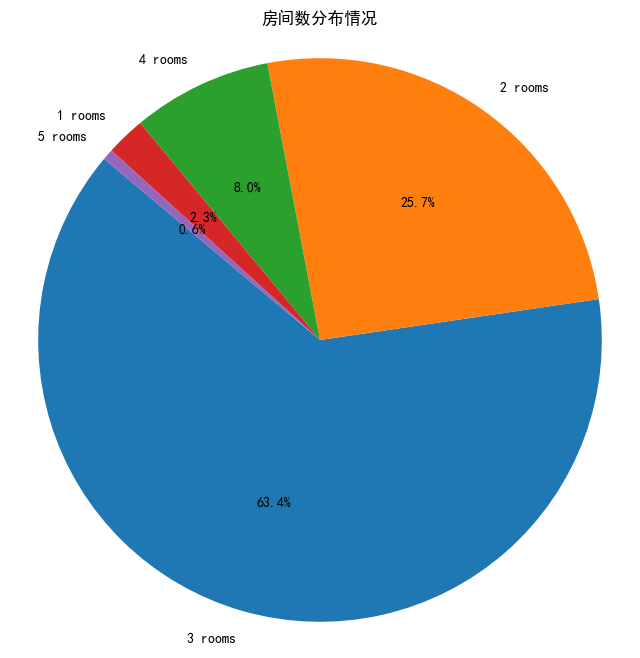

In [8]:
# 数据准备
sizes = [item[0] for item in result]
labels = [str(item[1]) + ' rooms' for item in result]

# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # 使饼图保持圆形
plt.title('房间数分布情况')
plt.show()

In [11]:
from wordcloud import WordCloud
df = pd.read_csv('clean.csv')
df

,标题,总价（万）,单价,小区,区域,房间数,大小,朝向,建造时间,标签
0,正南朝向 产权清晰 出行方便 电梯房 满二 高楼层视野无遮挡,250.0,26871,弘阳燕江府,栖霞,3,93.04,南,2018.0,"['南', '满二年', '户型方正']"
1,扬子一村 小三居 中间楼层 近扬子一中 靠经久菜场 二村菜场,78.0,10130,扬子一村,六合,3,77.00,南北,1992.0,"['南北', '满二年']"
2,南北通透 精装好房 低密度社区 带电梯 高楼层视野无遮挡,235.0,28314,云谷山庄,鼓楼,3,83.00,南北,2011.0,"['南北', '房东直卖', '有电梯', '近地铁']"
3,迈皋桥核心（无费用）优惠力度大 车接车 来电享优惠 专属,278.0,31236,金浦御龙湾,栖霞,2,89.00,南,NaN,"['南北通透', '厨卫全明', '动静分离', '多轨交']"
4,新城璞樾钟山 次新房 南向采光好 交通便捷 双卫生间 商品房,499.0,36262,新城璞樾钟山,栖霞,3,137.61,南,2019.0,"['南', '满二年', '近地铁', '次新房']"
...,...,...,...,...,...,...,...,...,...,...
1592,诚售价可刀 边户全明 满5且1 固定车位 可改3房 有钥匙,235.0,24227,翠屏清华园,江宁,2,97.00,南北,2012.0,"['南北', '满五年', '近地铁', '绿化率高']"
1593,燕子矶 次新小区 朝南 正规商品房 带电梯 满二 临地铁,259.0,28778,保利国际社区(一期),栖霞,3,90.00,南,2020.0,"['南', '满二年', '次新房']"
1594,中垠紫金观邸 产权清晰 临地铁 南北通透 板楼 出行方便,220.0,25883,中垠紫金观邸,栖霞,3,85.00,南北,2015.0,"['南北', '满五年', '近地铁', '车位充足']"
1595,临地铁 精装可拎包入住 中间楼层 小三房 商业配套成熟,250.0,28448,长营村145号小区,栖霞,3,87.88,南,1998.0,"['南', '房东直卖', '满五年', '近地铁']"


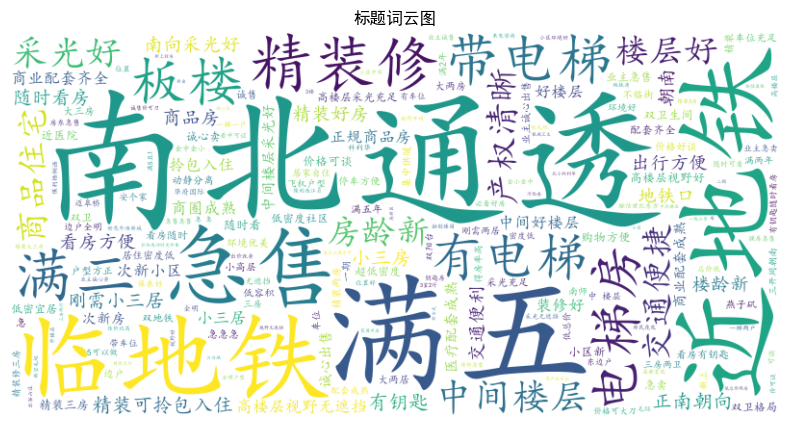

In [12]:


# 将标题列数据合并为一个字符串
text = ' '.join(df['标题'].values.tolist())

# 指定字体文件路径
font_path = 'C:\Windows\Fonts\simkai.ttf'  # 替换为您的字体文件路径（可以是系统字体或自定义字体）

# 生成词云
wordcloud = WordCloud(background_color='white', width=800, height=400, font_path=font_path).generate(text)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('标题词云图')
plt.show()